#### Matt Fry mkfry@uncc.edu
### Working with COVID19 datasets MIDTERM

# Midterm programming assignment
# Tasks:
## 1. Generate plots (use sort() and head() to make visualizations of most affected regions)
###   a. area map of deaths by country within last 8 days
###   b. line graph of deaths by US state
###   c. line graph of (confirmed cases - recovered) by US State
## 2. Parsing the relevant table, tell me:
###    a. What the highest single day increase in confirmed cases by Country, and produce a line graph displaying this
###    b. The highest single day increase in confirmed cases by US State, with a line graph displaying this
## 3. Edit credit opportunity: Think of anything else cool you could query or graph? Show it off!

### Make sure you have formatted your notebook to the best of your ability. This includes comments, markdown headers separating sections/tasks.

for updated datasets (you are not required to use the most up to date) see:
https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

#### ___IMPORTS and global variables

In [1]:

# import sys
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install matplotlib

In [2]:
import pandas as pd

path="032220/"  #This was the last dataset that I have with state information


#### ___functions

In [3]:
#I found myself having to recreate state info like this so I created this function to return summerized state info
#Also I had imported a State to ABV table for conversion
def StateFix(df):
    retDF = df[df["Country/Region"]=="US"]
    retDF["ABV"]=retDF["Province/State"].str.split(",",n=2,expand=True)[1]
    retDF.set_index("Province/State",inplace=True)
    for i in retDF.loc[:,"ABV"].index:
        for key,val in DF_stateDict.loc[:,'State'].items():
            if i.upper() in val:
                retDF.at[i,"ABV"]= DF_stateDict.iloc[key,1] 
    retDF["ABV"].fillna("OTHER",inplace=True)
    retdf1 =retDF.groupby("ABV").sum()
    retdf1= retdf1.iloc[:,4:len(retdf1.columns)].sort_values(by="3/22/20",ascending=False)
    retdf1.reset_index()
    return retdf1

#### <font color ="purple">___Read in CSV(s) into dataframe object for capturing plotable queries</font>

In [4]:
DF_confirmed = pd.read_csv(path + "time_series_19-covid-Confirmed.csv")#Datasets have changed a bit, primary dataset 
DF_deaths = pd.read_csv(path + "time_series_19-covid-Deaths.csv")       #timeframe for this is using 3/22/2020
DF_recovered = pd.read_csv(path + "time_series_19-covid-Recovered.csv")
DF_stateDict = pd.read_csv("stateUSabv.csv") #there where City, County injected into Province/State column, used to this group dataframe into Abbrevieations

## Part 1:


## a. area map of deaths by country within last 8 days
1. Needed to group by country
2. using iloc to return just the columns and values from last 8 days
3. Sorted those values based on the last column (descending), mainly that it was a running summary
4. Using head function to return 10 highest(descending), then making it an "area" type graph
5. Added a title to the graph and suppling total deaths for DataFrame

###### utilize the dynamic ability of column lengths throughout the code
##### define a dataframe harnessing the world death results matching part "a" so not to harm the orginal imports

Text(0.5, 0.98, 'Total deaths of COVID-19 for last 8 days by top 10 Countries-- DeathToll:14632')

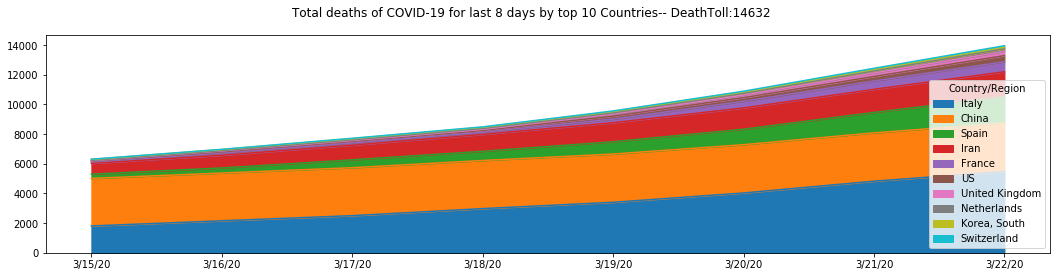

In [5]:
worldDeaths = DF_deaths.groupby("Country/Region").sum()
worldDeaths = worldDeaths.iloc[:,len(worldDeaths.columns)-8:len(worldDeaths.columns)]
worldDeaths.sort_values(by=worldDeaths.columns[len(worldDeaths.columns)-1], ascending=False, inplace=True)
#added a plot variable to further add titles
deathPLOT = worldDeaths.head(10).T.plot(kind="area",figsize =(18,4))
deathPLOT.figure.suptitle("Total deaths of COVID-19 for last 8 days by top 10 Countries-- DeathToll:"+str(DF_deaths["3/22/20"].sum()))


## b.  line graph of deaths by US state
1. defined a seperate dataframe filtering by US as the Country
2. After noticing that the new datasets had county/cities added, I needed to configure the State Grouping by cross referencing another dictionary containting State Abbrievations, later updating a ABV column in the statesDeath Dataframe
3. I placed anything that didn't translate into "OTHER" for proper grouping
4. Using a similar method in Part1a, I selected just the columns representing the last 8 days
5. Using the head function to pull back just the states recording deaths at this point in time(6) and sorted values off 3/22/2020, defined line graph at this point
6. Injected title into graph

##### utilize the StateFix function from an earlier declaration
##### summaries for State/Province exsisted on this particular dataset, county or city information was combined into State\Province column
##### further extraction had to be performed and summarized for proper representation

In [6]:
stateDeaths =StateFix(DF_deaths)

C:\PRGZ\Anaconda3\envs\MKFRY\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\PRGZ\Anaconda3\envs\MKFRY\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


###### added a plot variable to further add titles

Text(0.5, 0.98, 'Total deaths of COVID-19 by US States up to 3/22/2020 -- DeathToll:417')

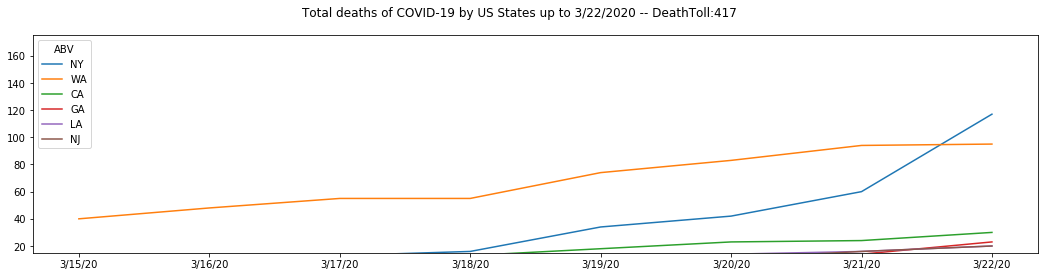

In [7]:
byStateDeathplot = stateDeaths.iloc[:,len(stateDeaths.columns)-8:len(stateDeaths.columns)].head(6).T.plot(kind ="line",figsize=(18,4),ylim=(15,175) )
byStateDeathplot.figure.suptitle("Total deaths of COVID-19 by US States up to 3/22/2020 -- DeathToll:"+str(stateDeaths["3/22/20"].sum()))

## c. line graph of (confirmed cases - recovered) by US State

##### re-utilizing the StateFix function to return desired datafram results
I utilize series data for the csv's seemed to have a running summary day by day...

In [8]:
confirmedUS = StateFix(DF_confirmed)["3/22/20"]
recoveredUS = StateFix(DF_recovered)["3/22/20"]

C:\PRGZ\Anaconda3\envs\MKFRY\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\PRGZ\Anaconda3\envs\MKFRY\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


##### utilize the subtract method from the dataframe class to get confirmed - recovered set values

In [9]:
CRdiffUS = confirmedUS.subtract(recoveredUS)
CRdiffUS = CRdiffUS.sort_values(ascending=False)

##### I further add a plot variable to further add titles

Text(0.5, 0.98, 'Who has not recoverd from COVID-19 by US States up to 3/22/2020 -- UnrecoveredTotal:33272')

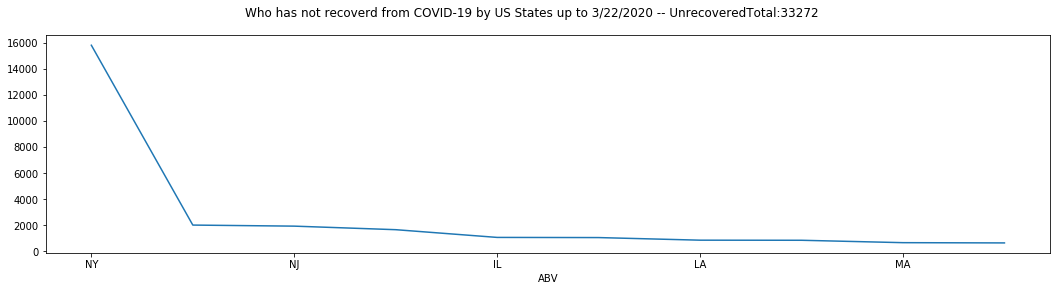

In [10]:
byCRdiffplot = CRdiffUS.head(10).plot(kind ="line",figsize=(18,4))
byCRdiffplot.figure.suptitle("Who has not recoverd from COVID-19 by US States up to 3/22/2020 -- UnrecoveredTotal:"+str(CRdiffUS.sum()))

## Part 2:


### a. What the highest single day increase in confirmed cases by Country, and produce a line graph displaying this

##### by defining and providing  loop function(s), using a while loop to track the rows and a for loop to iterate through the coloumns
   ##### further storing results to variables as cooridinates in the dataframe are tested

In [11]:
DayJumpsConfirmed = 0
BiggestJumpCountry ="ME"
Date1 = "2/2/20"
DayJumpsConfirmedDF = DF_confirmed
DayJumpsConfirmedDF = DayJumpsConfirmedDF.drop(["Lat","Long","Province/State"],axis=1)
DayJumpsConfirmedDF.set_index("Country/Region",inplace=True)

x = 0
while x < len(DayJumpsConfirmedDF):
    for cols in range(len(DayJumpsConfirmedDF.columns)-1):
        if cols < len(DayJumpsConfirmedDF.columns):
            day1 =DayJumpsConfirmedDF.iloc[x,cols]
            day2 =DayJumpsConfirmedDF.iloc[x,cols+1] 
            if DayJumpsConfirmed <= day2 -day1: 
                DayJumpsConfirmed = day2- day1
                BiggestJumpCountry = DayJumpsConfirmedDF.iloc[x].name
                Date1 = DayJumpsConfirmedDF.columns[cols]
    x+=1
DayJumpsConfirmedDF.reset_index(inplace=True)
print("The Country with the biggest spike in cases----"+BiggestJumpCountry)
print("This happend on----------------------------" + Date1)
print("The max day spike in the world was:--------"+str(DayJumpsConfirmed))

The Country with the biggest spike in cases----China
This happend on----------------------------2/12/20
The max day spike in the world was:--------14840


##### After discovering the values seeked, further filter that set from the rest of the DataFrame

In [12]:

DayJumpsConfirmedDF = DayJumpsConfirmedDF[DayJumpsConfirmedDF["Country/Region"]=="China"]
DJCjumpgroup = DayJumpsConfirmedDF.groupby("Country/Region").sum().iloc[:,DayJumpsConfirmedDF.columns.get_loc(Date1)-3:DayJumpsConfirmedDF.columns.get_loc(Date1)+3]


##### added a plot variable to further add titles and annotations

Text(0.5, 0.98, 'Biggest confirmed case spike of COVID-19 global up to 3/22/2020 -- Country:China on 2/12/20 with 14840')

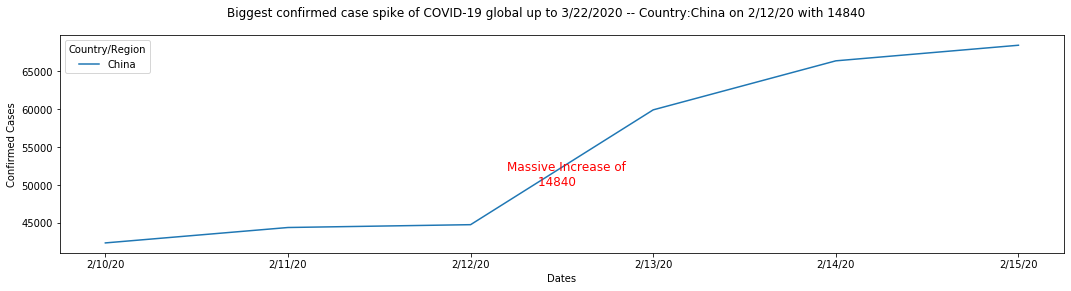

In [13]:
DJCplot = DJCjumpgroup.T.plot(kind ="line",figsize=(18,4))
DJCplot.set_ylabel("Confirmed Cases")
DJCplot.set_xlabel("Dates")
DJCplot.text(2.2,50000, 'Massive Increase of \n        '+str(DayJumpsConfirmed), horizontalalignment='left', size='large', color='red')
DJCplot.figure.suptitle("Biggest confirmed case spike of COVID-19 global up to 3/22/2020 -- Country:"+BiggestJumpCountry + " on "+Date1 +" with "+str(DayJumpsConfirmed))

###    b. The highest single day increase in confirmed cases by US State, with a line graph displaying this
##### by defining and providing  loop function(s), using a while loop to track the rows and a for loop to iterate through the coloumns
   ##### further storing results to variables as cooridinates in the dataframe are tested but using State information instead

In [14]:
DayJumpsConfirmedState = 0
BiggestJumpState ="ME"
Date2 = "2/2/20"
DayJumpsConfirmedStateDF = StateFix(DF_confirmed)

x = 0
while x < len(DayJumpsConfirmedStateDF):
    for cols in range(len(DayJumpsConfirmedStateDF.columns)-1):
        if cols < len(DayJumpsConfirmedStateDF.columns):
            day1 =DayJumpsConfirmedStateDF.iloc[x,cols]
            day2 =DayJumpsConfirmedStateDF.iloc[x,cols+1] 
            if DayJumpsConfirmedState <= day2 -day1: 
                DayJumpsConfirmedState = day2- day1
                BiggestJumpState = DayJumpsConfirmedStateDF.iloc[x].name
                Date2 = DayJumpsConfirmedStateDF.columns[cols]
    x+=1
DayJumpsConfirmedStateDF.reset_index(inplace=True)
print("The State with the biggest spike in cases----"+BiggestJumpState)
print("This happend on----------------------------" + Date2)
print("The max day spike in the world was:--------"+str(DayJumpsConfirmedState))

The State with the biggest spike in cases----NY
This happend on----------------------------3/21/20
The max day spike in the world was:--------4083


C:\PRGZ\Anaconda3\envs\MKFRY\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\PRGZ\Anaconda3\envs\MKFRY\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


##### After discovering the values seeked, further filter that set from the rest of the DataFrame

In [22]:
DayJumpsConfirmedStateDF = DayJumpsConfirmedStateDF[DayJumpsConfirmedStateDF["ABV"]=="NY"]
DJCjumpgroup = DayJumpsConfirmedStateDF.groupby("ABV").sum().iloc[:,DayJumpsConfirmedStateDF.columns.get_loc(Date2)-3:DayJumpsConfirmedStateDF.columns.get_loc(Date2)+1]

###### added a plot variable to further add titles and annotations

Text(0.5, 0.98, 'Biggest confirmed case spike of COVID-19 in US up to 3/22/2020 -- State:NY on 3/21/20 with 4083')

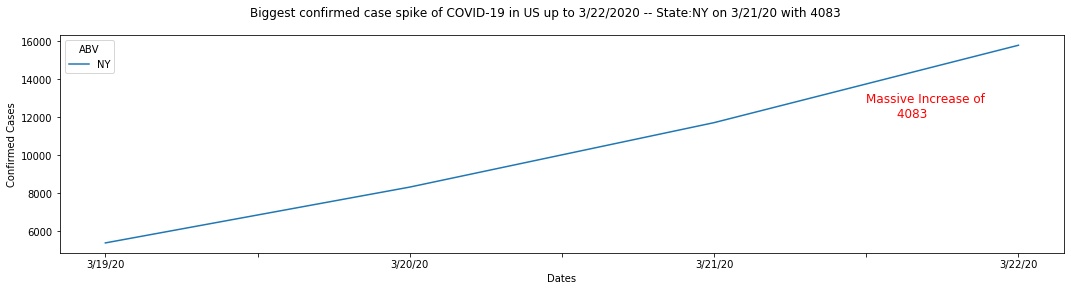

In [23]:
DJCstateplot = DJCjumpgroup.T.plot(kind ="line",figsize=(18,4))
DJCstateplot.set_ylabel("Confirmed Cases")
DJCstateplot.set_xlabel("Dates")
DJCstateplot.text(2.5,12000, 'Massive Increase of \n        '+str(DayJumpsConfirmedState), horizontalalignment='left', size='large', color='red')
DJCstateplot.figure.suptitle("Biggest confirmed case spike of COVID-19 in US up to 3/22/2020 -- State:"+BiggestJumpState + " on "+Date2 +" with "+str(DayJumpsConfirmedState))

### DayJumpsConfirmedStateDF

### EXTRA credit opportunity:
##### I have created a function to export graphs to export folder as a pdf document 
#### with added annotations of creation

In [24]:
from matplotlib.backends.backend_pdf import PdfPages  #extra Credit?
from datetime import date, datetime

In [25]:
def savePLTs(plt,filename,title,keyword):
    with PdfPages(filename) as pdf:
        plt.figsize = (18,10)
        pdf.savefig(plt.figure)
        d = pdf.infodict()
        d['Title'] = title
        d['Author'] = 'MKFRY'
        d['Subject'] = 'COVID19datasets'
        d['Keywords'] = 'COVID19'
        d['CreationDate'] = datetime.today()
        d['ModDate'] = datetime.today()

##### export all graphs

In [26]:
savePLTs(deathPLOT,"Exports/COVID19_deathTollWORLD.pdf","COVID19_deathTollWORLD","deaths global")
savePLTs(byStateDeathplot,"Exports/COVID19_deathTollstates.pdf","COVID19_deathTollstates","deaths states")
savePLTs(byCRdiffplot,"Exports/COVID19_recoverVsConfirmedStates.pdf","COVID19_recoverVsConfirmedStates","confirmed-recovered states")
savePLTs(DJCplot,"Exports/COVID19_LargeCountryDaySpike.pdf","COVID19_LargeCountryDaySpike","cases day global")
savePLTs(DJCstateplot,"Exports/COVID19_LargestateDaySpike.pdf","COVID19_LargestateDaySpike","cases day state")